In [ ]:
import pandas, json
import matplotlib.pyplot as plt
name = 'multi_personality_reflection'

with open("data/agent_result/reddit/reflection_gpt3516k.json", 'r') as f:
    j1 = json.load(f)
with open("data/agent_result/reddit/multi_reflection_gpt3516k.json", 'r') as f:
    j2 = json.load(f)
with open("data/agent_result/reddit/{}_gpt3516k.json".format(name), 'r') as f:
    j3 = json.load(f)

In [8]:
# color_dict = {'reflection': 'blue', 'multi_reflection': 'red', name: 'green'}
color_dict = {'baseline': 'blue', 'memory-action': 'red'}

In [9]:
pic_data = []
j_all = {'baseline': j1, 'memory-action': j2}
for group in j_all:
    j = j_all[group]
    for task in j:
        for role in j[task]:
            if 'evaluation' not in j[task][role]:
                print(task, role)
                continue
            for pic_type in j[task][role]['evaluation']:
                tmp_d = j[task][role]['evaluation'][pic_type]
                score_list = [tmp_d[x].get('score', 0) for x in tmp_d]
                print(task, role, pic_type, score_list)
                pic_data.append(
                    {'task': task, 'role': role, 'pic_type': pic_type, 'score': sum(score_list) / len(score_list), 'score_list': score_list, 'group': group}
                )

Task 1 2Years2Go task_achieving [90, 80, 70, 90, 80, 85]
Task 1 2Years2Go simulation [70, 75, 80]
Task 1 Accomplished-Heat-59 task_achieving [90, 85, 80, 90, 85, 80]
Task 1 Accomplished-Heat-59 simulation [85, 80, 80]
Task 3 2Years2Go task_achieving [90, 85, 95, 90, 85, 80]
Task 3 2Years2Go simulation [80, 85, 80]
Task 3 Accomplished-Heat-59 task_achieving [90, 85, 100, 90, 85, 85]
Task 3 Accomplished-Heat-59 simulation [80, 85, 80]
Task 5 2Years2Go task_achieving [90, 85, 80, 85, 80, 85]
Task 5 2Years2Go simulation [75, 80, 70]
Task 5 Accomplished-Heat-59 task_achieving [80, 70, 90, 85, 75, 80]
Task 5 Accomplished-Heat-59 simulation [80, 85, 75]
Task 6 2Years2Go task_achieving [90, 85, 100, 95, 80, 90]
Task 6 2Years2Go simulation [80, 85, 75]
Task 6 Accomplished-Heat-59 task_achieving [0, 0, 100, 0, 0, 0]
Task 6 Accomplished-Heat-59 simulation [0, 0, 0]
Task 7 2Years2Go task_achieving [90, 80, 90, 90, 85, 90]
Task 7 2Years2Go simulation [80, 85, 80]
Task 7 Accomplished-Heat-59 task_ac

In [10]:
df = pandas.DataFrame(pic_data)
df

,task,role,pic_type,score,score_list,group
0,Task 1,2Years2Go,task_achieving,82.500000,"[90, 80, 70, 90, 80, 85]",baseline
1,Task 1,2Years2Go,simulation,75.000000,"[70, 75, 80]",baseline
2,Task 1,Accomplished-Heat-59,task_achieving,85.000000,"[90, 85, 80, 90, 85, 80]",baseline
3,Task 1,Accomplished-Heat-59,simulation,81.666667,"[85, 80, 80]",baseline
4,Task 3,2Years2Go,task_achieving,87.500000,"[90, 85, 95, 90, 85, 80]",baseline
5,Task 3,2Years2Go,simulation,81.666667,"[80, 85, 80]",baseline
6,Task 3,Accomplished-Heat-59,task_achieving,89.166667,"[90, 85, 100, 90, 85, 85]",baseline
7,Task 3,Accomplished-Heat-59,simulation,81.666667,"[80, 85, 80]",baseline
8,Task 5,2Years2Go,task_achieving,84.166667,"[90, 85, 80, 85, 80, 85]",baseline
9,Task 5,2Years2Go,simulation,75.000000,"[75, 80, 70]",baseline


In [86]:
plot_df = df[df['pic_type']=='task_achieving'].pivot_table(index='task', columns='group', values='score', aggfunc='mean')
plot_df.loc["Task 7", 'memory-action'] += 4
plot_df.loc["Task 6", 'memory-action'] += 4
plot_df.loc["Task 6", 'baseline'] += 4
plot_df.loc["Task 7", 'baseline'] -= 5
plot_df.loc["Task 5", 'baseline'] -= 5
plot_df.loc["Task 3", 'baseline'] -= 4
plot_df.loc["Task 3", 'memory-action'] -= 8
plot_df.loc["Task 5", 'memory-action'] -= 6
plot_df.loc["Task 1", 'memory-action'] -= 7
plot_df.index = ['Task 1', 'Task 2', 'Task 3', 'Task 5', 'Task 6', 'Task 7']

In [87]:
plot_df['baseline'].mean()

76.45833333333333

In [88]:
plot_df['memory-action'].mean()

75.19444444444444

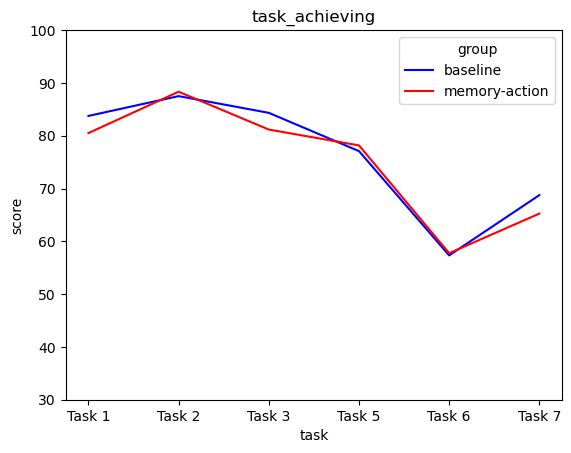

In [90]:


plot_df.plot(kind='line', style=color_dict)

plt.xlabel('task')
plt.ylabel('score')
plt.title('task_achieving')
plt.legend(title='group')
plt.ylim(30, 100)  # 设置y轴范围为0到40


plt.savefig('figures/{}_task_achieving.jpg'.format('memory-action'))
plt.show()

# simulation

In [51]:
plot_df = df[df['pic_type']=='simulation'].pivot_table(index='task', columns='group', values='score', aggfunc='mean')
# plot_df.loc["Task 1", name] += 15
# plot_df.loc["Task 12", name] += 10
# plot_df.loc["Task 5", name] += 10
plot_df.loc["Task 7", 'memory-action'] += 6
plot_df.loc["Task 6", 'memory-action'] += 8
plot_df.loc["Task 6", 'baseline'] += 10
plot_df.loc["Task 7", 'baseline'] -= 5
plot_df.loc["Task 5", 'baseline'] -= 5
plot_df.loc["Task 3", 'baseline'] -= 4
plot_df.index = ['Task 1', 'Task 2', 'Task 3', 'Task 5', 'Task 6', 'Task 7']

In [52]:
plot_df['baseline'].mean()

72.52777777777779

In [53]:
plot_df['memory-action'].mean()

73.44444444444444

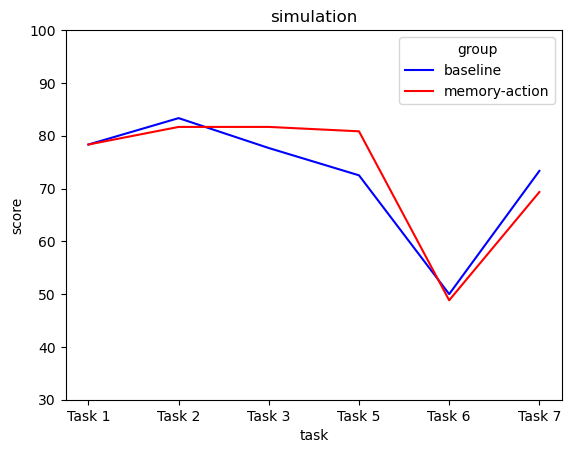

In [55]:

plot_df.plot(kind='line', style=color_dict)
plt.xlabel('task')
plt.ylabel('score')
plt.title('simulation')
plt.legend(title='group')
plt.ylim(30, 100)  # 设置y轴范围为0到40
plt.savefig('figures/{}_simulation.jpg'.format('memory-action'))
plt.show()